In [1]:
import os 
import cv2
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Introduction

>Principal Components Analysis (PCA) is a very useful data science tools for reducing N dimensions into a smaller number of dimensions. By reducing the number of dimensions in the dataset, it helps to find features that explain the relations in the data and gets better understanding of the data.

# Load Data From Pickle Files

> Here I will explain how to use PCA to get the Eigenvectors of a dataset of faces from my personal data using pickle.

In [2]:
pickle_X = open("Face_Recognition_X.pickle","rb")
faces_image = pickle.load(pickle_X)
pickle_y = open("Face_Recognition_y.pickle","rb")
faces_target = pickle.load(pickle_y)

# Create DataFrame

In [3]:
faces_data = faces_image.reshape(faces_image.shape[0], faces_image.shape[1] * faces_image.shape[2])

X = pd.DataFrame(faces_data)
y = pd.Series(faces_target , name = "target").map({0 : "Unknown", 1 : "Austin", 2: "Sister"})

df = pd.concat([X,y],axis= 1)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,target
0,30,28,41,65,43,24,20,24,23,31,...,153,179,177,186,205,209,212,212,224,Unknown
1,60,66,69,51,59,65,61,75,77,94,...,166,166,142,97,70,69,76,96,146,Unknown
2,143,139,138,153,65,46,64,54,42,44,...,60,55,53,61,75,87,77,69,75,Unknown
3,121,122,122,122,120,120,118,88,56,92,...,84,82,84,82,83,85,82,82,82,Unknown
4,74,72,73,75,74,74,72,59,12,16,...,65,50,65,89,90,67,64,62,64,Unknown


>In this dataset, all images are in grayscale and seperate in 3 classes. [Austin, Sister, Unknown] <br/>
Plotting some faces and print an example on how to read them from the Pandas DataFrame.

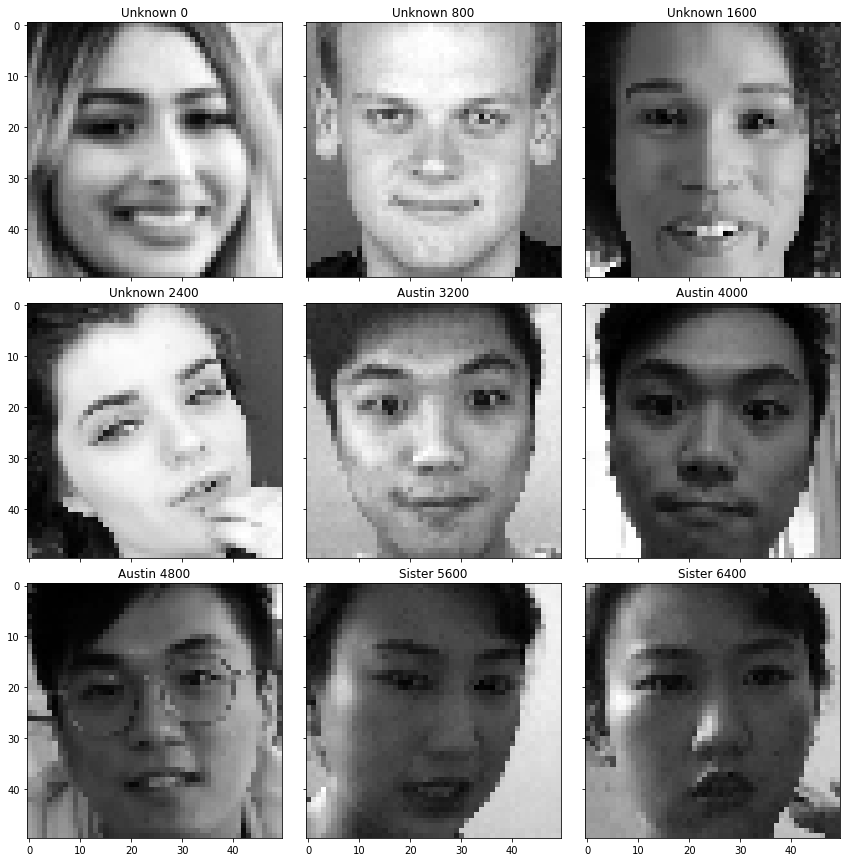

In [4]:
fig, ax = plt.subplots(3, 3,figsize=(15, 15), sharex='col', sharey='row',facecolor='w')

image_num = 0

for i in range (0,3):
    for j in range (0,3):
            ax[i,j].imshow(faces_image[image_num], cmap = 'gray')
            ax[i,j].set_title(y[image_num] + " " + str(image_num));
            image_num += 800
            
plt.subplots_adjust(wspace=0, hspace=0.1)

# Train Test Split

>Using Train Test Split, the X_train & X_test is the dependent variables with the 2500 pixels dataset and the y_train & y_test is the independent variable with the 3 different classes dataset. It separated into 80% training set and 20% testing set in random order.  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2 , shuffle = True)

# KNN Classifier

>The first attempt with KNN classifier is able to get a 94% classification. Not bad!

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
score1 = knn.score(X_test, y_test)
score1

0.9451388888888889

> Here, it's the classification report and showing how well the performance. 

In [7]:
report1 = classification_report(y_test,y_pred1)
print(report1)

              precision    recall  f1-score   support

      Austin       0.93      0.96      0.95       477
      Sister       0.92      1.00      0.96       369
     Unknown       0.98      0.90      0.94       594

    accuracy                           0.95      1440
   macro avg       0.94      0.95      0.95      1440
weighted avg       0.95      0.95      0.94      1440



# Standard Scaler

> Using Standard Scaler, it helps to normalise the data within a particular range and also helps in speeding up the calculations in an algorithm.

In [8]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Principal Components Analysis

>PCA is most commonly used for dimension reduction. In order to reduce the number of dimensions, we have to calculate the PCs and then decide if there is a lower number of PCs ($d$) than the number of features ($k$) in the data that we can use to accurately represent the data.  

In [9]:
pca = PCA(n_components=15, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
expl_var = pca.explained_variance_ratio_

>Based on the plot and cumulative sums plot below, it seems like after 15 PCs, we are no longer adding that much information by including more PCs.

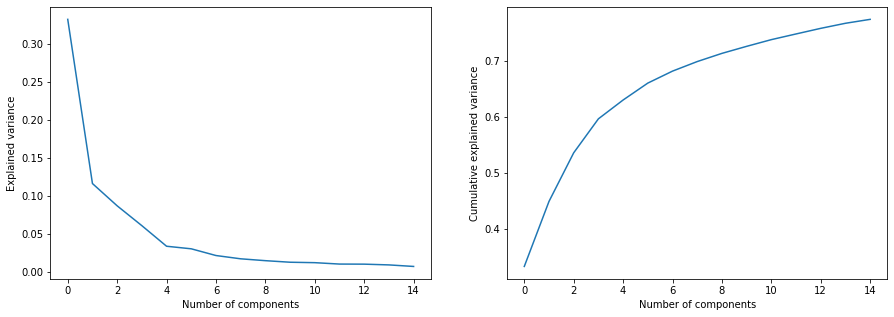

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15, 5),facecolor='w')

ax[0].plot(expl_var);
ax[0].set_xlabel('Number of components');
ax[0].set_ylabel('Explained variance');
ax[1].plot(np.cumsum(expl_var));
ax[1].set_xlabel('Number of components');
ax[1].set_ylabel('Cumulative explained variance');


# KNN with Standard Scaler & Principal Components Analysis

> Using PCA, we are able to reduce the dimensions and able to build eignfaces based on face shape and eyes.<br> The second attempt with PCA and KNN is able to improve the classification result to 95%. Which it's pretty good.


In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred2 = knn.predict(X_test_pca)
score2 = knn.score(X_test_pca, y_test)
score2

0.9520833333333333

>Here, it's the second classification report with KNN & PCA and showing a better performance. 

In [12]:
report2 = classification_report(y_test,y_pred2)
print(report2)

              precision    recall  f1-score   support

      Austin       0.92      0.97      0.95       477
      Sister       0.95      1.00      0.97       369
     Unknown       0.98      0.91      0.94       594

    accuracy                           0.95      1440
   macro avg       0.95      0.96      0.95      1440
weighted avg       0.95      0.95      0.95      1440



# PCA on the Images

Here, it's the power of PCA on the images:

>PCA can generated eigenvectors of the dataset where these vectors are actually representation of image of faces. These eigenvectors made a so-called basis for the dataset which means that any image in a set of faces can be expressed as a combination these eigenfaces.

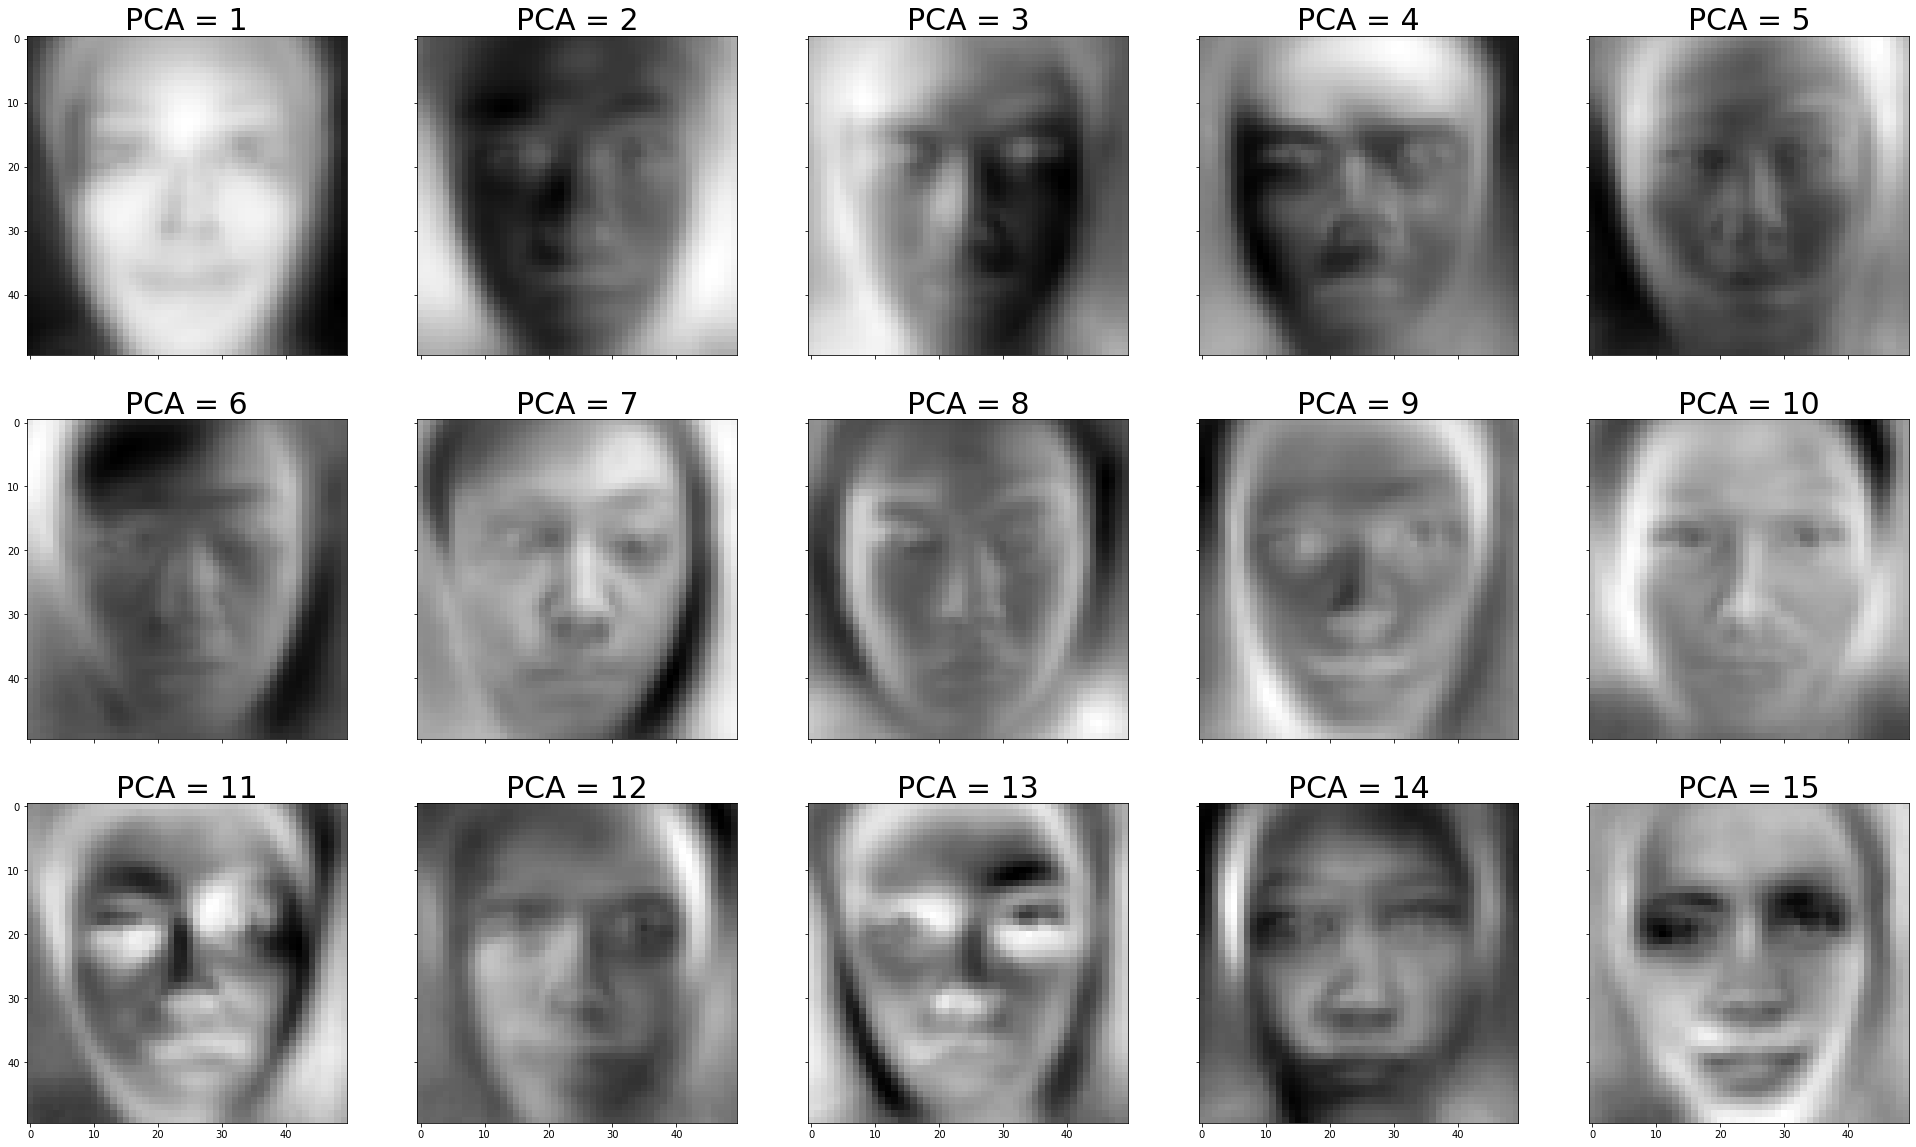

In [13]:
fig, ax = plt.subplots(3, 5,figsize=(35, 20), sharex='col', sharey='row',facecolor='w')

image_num = 0

for i in range (0,3):
    for j in range (0,5):
            ax[i,j].imshow(pca.components_[image_num].reshape(50,50), cmap = 'gray')
            ax[i,j].set_title("PCA" + " = " + str(image_num + 1),fontsize=30);
            image_num += 1

plt.subplots_adjust(wspace=0, hspace= 0.2)